In [1]:
!pip install spacy --user
!python3 -m spacy download it_core_news_sm
!pip3 install -U spacy
!pip3 install spacy
!python -m spacy download it_core_news_sm

     |████████████████████████████████| 21.1 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
     |████████████████████████████████| 21.1 MB 4.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import pandas as pd

In [3]:
df= pd.read_csv('Books.csv')
df

,Unnamed: 0,_id,author,contents,publishing house,year
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904


In [4]:
df['Frasi']= df.apply(lambda row: nltk.sent_tokenize(row['contents']), axis=1)
df

,Unnamed: 0,_id,author,contents,publishing house,year,Frasi
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014,[Quel giorno era impossibile uscire a passeggi...
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904,"[In quel giorno era impossibile passeggiare., ..."


In [5]:
Frasi = list(df['Frasi'][0])
Frasi2 = list(df['Frasi'][1])
import numpy as np
Frasi_Feltrinelli = pd.DataFrame(Frasi, columns={'Frasi'})
Frasi_Treves = pd.DataFrame(Frasi2, columns={'Frasi'})

In [6]:
Frasi_Feltrinelli.to_csv('Frasi_Feltrinelli.csv', encoding="utf-8")
Frasi_Treves.to_csv('Frasi_Treves.csv', encoding="utf-8")

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import spacy
from spacy.lang.it.examples import sentences 
from tqdm.notebook import tqdm
tqdm.pandas()
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 1064150 
pipe = nlp.pipe(df['contents'], n_process=2, batch_size=2000)

In [9]:
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [10]:
data = df

In [11]:
data['spacy_doc'] = docs

In [12]:
data['POS_spacy'] = data['spacy_doc'].progress_apply(lambda x: [(y.text, y.pos_) for y in x])

  0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
data['lemmatized'] = data['spacy_doc'].progress_apply(lambda x: " ".join([y.lemma_ for y in x if len(x)>1]))

  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
data['tokens'] = data['spacy_doc'].progress_apply(lambda x: [y.text for y in x])

  0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
data['language'] = data['spacy_doc'].progress_apply(lambda x: set([y.lang_ for y in x]))

  0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
data['language'] = data['language'].progress_apply(lambda x: list(x)[0])

  0%|          | 0/2 [00:00<?, ?it/s]

In [17]:
def filter_text_pos(x):
    final_pos_text = []
    for elem in x:
        for pos in pos_list:
            if elem[1] == pos:
                final_pos_text.append(elem[0])
    
    return " ".join(final_pos_text)

In [18]:
pos_list = ["NOUN"]
data["NOUN"] = data.apply(lambda x: filter_text_pos(x["POS_spacy"]), axis=1)
data['NOUN_count'] = data['NOUN'].apply(lambda x: len(x.split()))

In [19]:
def clean(x):
  stop = stopwords.words("italian")
  stop = stop + list(string.punctuation)
  words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop]
  return " ".join(words)

In [20]:
data['clean']= data.apply(lambda row: nltk.word_tokenize(row['NOUN']), axis=1)

In [21]:
data

,Unnamed: 0,_id,author,contents,publishing house,year,Frasi,spacy_doc,POS_spacy,lemmatized,tokens,language,NOUN,NOUN_count,clean
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014,[Quel giorno era impossibile uscire a passeggi...,"(Quel, giorno, era, impossibile, uscire, a, pa...","[(Quel, DET), (giorno, NOUN), (era, AUX), (imp...",quello giorno essere impossibile uscire a pass...,"[Quel, giorno, era, impossibile, uscire, a, pa...",it,giorno passeggio mattino realtà ora arbusti pr...,34092,"[giorno, passeggio, mattino, realtà, ora, arbu..."
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904,"[In quel giorno era impossibile passeggiare., ...","(In, quel, giorno, era, impossibile, passeggia...","[(In, ADP), (quel, DET), (giorno, NOUN), (era,...",in quello giorno essere impossibile passeggiar...,"[In, quel, giorno, era, impossibile, passeggia...",it,giorno mattina ora boschetto foglie pranzo sig...,29333,"[giorno, mattina, ora, boschetto, foglie, pran..."


In [22]:
data['clean']= data.apply(lambda row: nltk.word_tokenize(row['NOUN']), axis=1)

In [23]:
data['clean']

0    [giorno, passeggio, mattino, realtà, ora, arbu...
1    [giorno, mattina, ora, boschetto, foglie, pran...
Name: clean, dtype: object

In [24]:
word_list = nltk.word_tokenize(str(data['NOUN'][0]))
word_list2 = nltk.word_tokenize(str(data['NOUN'][1]))
import numpy as np
noun1 = pd.DataFrame(word_list, columns={'text'})
noun2 = pd.DataFrame(word_list2, columns={'text'})

In [25]:
import spacy
from spacy.lang.it.examples import sentences 
from tqdm.notebook import tqdm
tqdm.pandas()
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 1064150 
pipe = nlp.pipe(noun1['text'], n_process=2, batch_size=2000)

In [26]:
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [27]:
noun1['spacy_doc'] = docs

In [28]:
noun1['lemmatized'] = noun1['spacy_doc'].progress_apply(lambda x: " ".join([y.lemma_ for y in x ]))

  0%|          | 0/34181 [00:00<?, ?it/s]

In [29]:
noun1

,text,spacy_doc,lemmatized
0,giorno,(giorno),giorno
1,passeggio,(passeggio),passeggio
2,mattino,(mattino),mattino
3,realtà,(realtà),realtà
4,ora,(ora),ora
...,...,...,...
34176,pegno,(pegno),pegno
34177,Signore,(Signore),signore
34178,giorno,(giorno),giorno
34179,chiarezza,(chiarezza),chiarezza


In [30]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
def clean(x):
  stop = stopwords.words("italian")
  stop = stop + list(string.punctuation)
  words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop]
  return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
noun1["Lemmi"] = noun1["lemmatized"].apply(clean)

In [32]:
noun1

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,giorno
1,passeggio,(passeggio),passeggio,passeggio
2,mattino,(mattino),mattino,mattino
3,realtà,(realtà),realtà,realtà
4,ora,(ora),ora,ora
...,...,...,...,...
34176,pegno,(pegno),pegno,pegno
34177,Signore,(Signore),signore,signore
34178,giorno,(giorno),giorno,giorno
34179,chiarezza,(chiarezza),chiarezza,chiarezza


In [33]:
result_df = noun1.drop_duplicates(subset=['Lemmi'])

In [34]:
result_df

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,giorno
1,passeggio,(passeggio),passeggio,passeggio
2,mattino,(mattino),mattino,mattino
3,realtà,(realtà),realtà,realtà
4,ora,(ora),ora,ora
...,...,...,...,...
34125,convoglio,(convoglio),convogliare,convogliare
34132,rinneghi,(rinneghi),rinneghi,rinneghi
34136,dominatore,(dominatore),dominatore,dominatore
34142,supreme,(supreme),supreme,supreme


In [88]:
result_df['Lemmi']

0             giorno
1          passeggio
2            mattino
3             realtà
4                ora
            ...     
34125    convogliare
34132       rinneghi
34136     dominatore
34142        supreme
34176          pegno
Name: Lemmi, Length: 5467, dtype: object

In [35]:
lemmi = result_df['Lemmi']
lemmi.to_csv('Feltrinelli_Lemmi.csv', encoding="utf-8")

In [36]:
import spacy
from spacy.lang.it.examples import sentences 
from tqdm.notebook import tqdm
tqdm.pandas()
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 1064150 
pipe = nlp.pipe(noun2['text'], n_process=2, batch_size=2000)
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [37]:
noun2['spacy_doc'] = docs
noun2['lemmatized'] = noun2['spacy_doc'].progress_apply(lambda x: " ".join([y.lemma_ for y in x ]))

  0%|          | 0/29363 [00:00<?, ?it/s]

In [38]:
noun2["Lemmi"] = noun2["lemmatized"].apply(clean)

In [39]:
noun2

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,giorno
1,mattina,(mattina),mattina,mattina
2,ora,(ora),ora,ora
3,boschetto,(boschetto),boschetto,boschetto
4,foglie,(foglie),foglia,foglia
...,...,...,...,...
29358,liberazione,(liberazione),liberazione,liberazione
29359,ora,(ora),ora,ora
29360,ardore,(ardore),ardore,ardore
29361,venite,(venite),venire,venire


In [40]:
result_df2 = noun2.drop_duplicates(subset=['Lemmi'])

In [41]:
result_df2

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,giorno
1,mattina,(mattina),mattina,mattina
2,ora,(ora),ora,ora
3,boschetto,(boschetto),boschetto,boschetto
4,foglie,(foglie),foglia,foglia
...,...,...,...,...
29291,marina,(marina),marino,marino
29306,redenzione,(redenzione),redenzione,redenzione
29316,austerità,(austerità),austerità,austerità
29317,guerriero,(guerriero),guerriero,guerriero


In [42]:
noun2

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,giorno
1,mattina,(mattina),mattina,mattina
2,ora,(ora),ora,ora
3,boschetto,(boschetto),boschetto,boschetto
4,foglie,(foglie),foglia,foglia
...,...,...,...,...
29358,liberazione,(liberazione),liberazione,liberazione
29359,ora,(ora),ora,ora
29360,ardore,(ardore),ardore,ardore
29361,venite,(venite),venire,venire


In [43]:
lemmi2 = result_df2['Lemmi']
lemmi2.to_csv('Treves_Lemmi.csv', encoding="utf-8")

In [65]:
common = list(set(lemmi.values).intersection(set(lemmi2.values)))

In [66]:
uncommon=list(set(lemmi.values).symmetric_difference(set(lemmi2.values)))

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from wordcloud import WordCloud
from PIL import Image
from os import path, getcwd
import dataframe_image as dfi

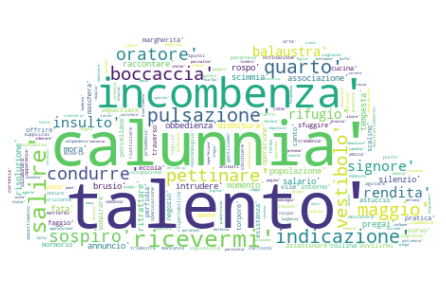

In [69]:
path_cloud = "aa.png"
cloud = np.array(Image.open(path_cloud))
Common_Lemmi = WordCloud(background_color="white", mask=cloud).generate(str(common))
plt.figure(figsize=(8,5))
plt.imshow(Common_Lemmi, interpolation="bilinear")
plt.axis("off")
Common_Lemmi.to_file("images_d\Common_Lemmi.png")
plt.show()

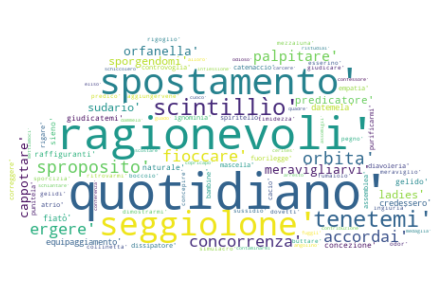

In [70]:
path_cloud = "aa.png"
cloud = np.array(Image.open(path_cloud))
Uncommon_Lemmi = WordCloud(background_color="white", mask=cloud).generate(str(uncommon))
plt.figure(figsize=(8,5))
plt.imshow(Uncommon_Lemmi, interpolation="bilinear")
plt.axis("off")
#Uncommon_Lemmi.to_file("images_d\Uncommon_Lemmi.png")
plt.show()

In [83]:
Common_noun = pd.DataFrame(common, columns={'Common'})
Common_noun

,Common
0,
1,talento
2,calunnia
3,incombenza
4,ricevermi
...,...
2844,stendardo
2845,impedire
2846,divino
2847,margine


In [89]:
Uncommon_noun = pd.DataFrame(uncommon, columns={'Uncommon'})
Uncommon_noun

,Uncommon
0,quotidiano
1,ragionevoli
2,spostamento
3,seggiolone
4,scintillìo
...,...
4035,spingetemi
4036,cottura
4037,ispido
4038,ricevei
